<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_07_BinaryImages_ConnectedComponents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL
from scipy.signal import convolve
import random
random.seed(3)

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
def histogram(img:np.array) -> np.array:
    hist = np.zeros(256, dtype='int16')
    nrows, ncols = img.shape
    for r in range(nrows):
        for c in range(ncols):
            hist[img[r, c]] += 1
    return hist

In [ ]:
def plot_img_hist(img:np.array):
    hist = histogram(img)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
    axes[0].imshow(img,  cmap='gray', vmin=0, vmax=255)

    axes[1].set_xlim([0, 256])
    axes[1].set_ylim([0, hist[1:-1].max()])
    axes[1].bar(np.arange(len(hist)),height=hist);

In [ ]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

# 7. Binary Images and Connected Components

##7.1 Binary Images

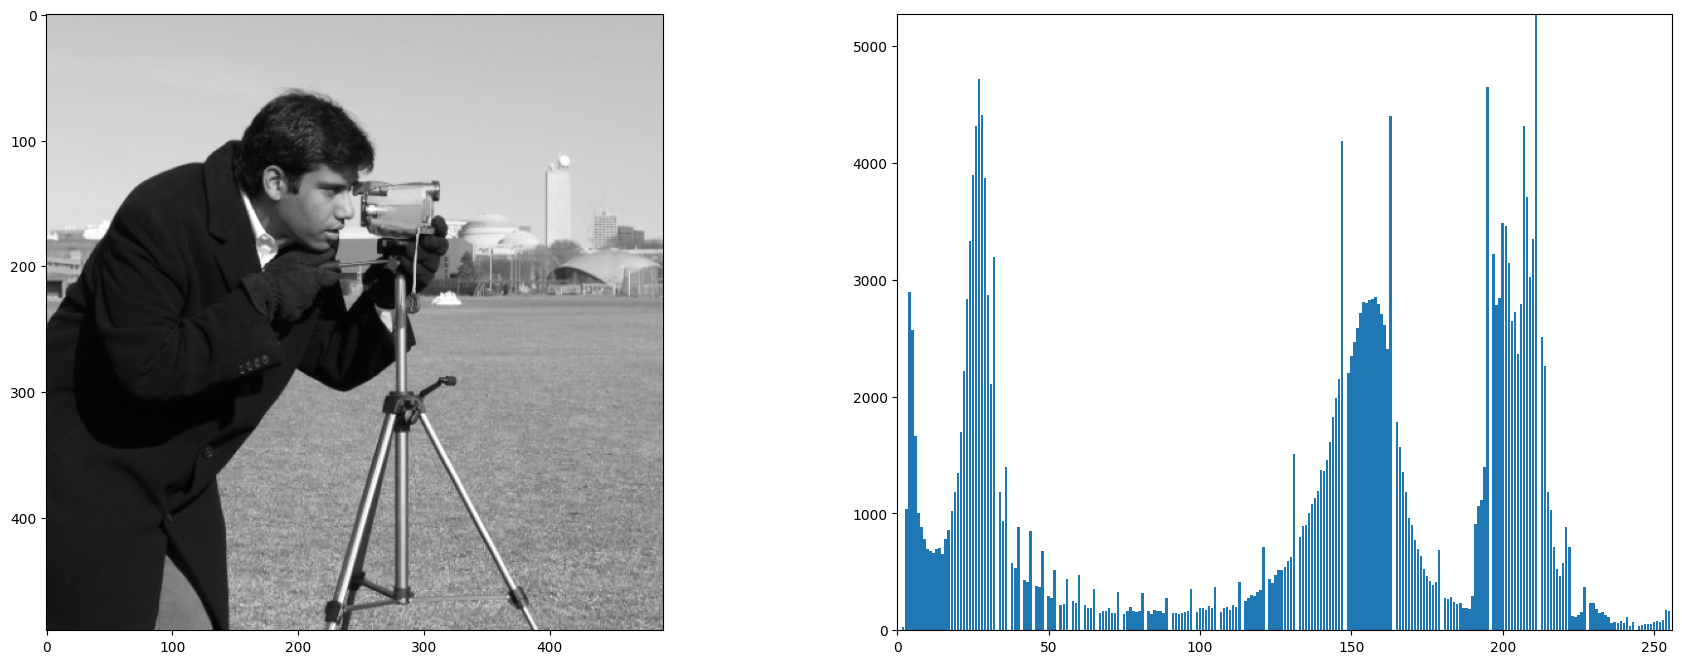

In [ ]:
img = read_file('camera1.tif')[:,:,0]
plot_img_hist(img)

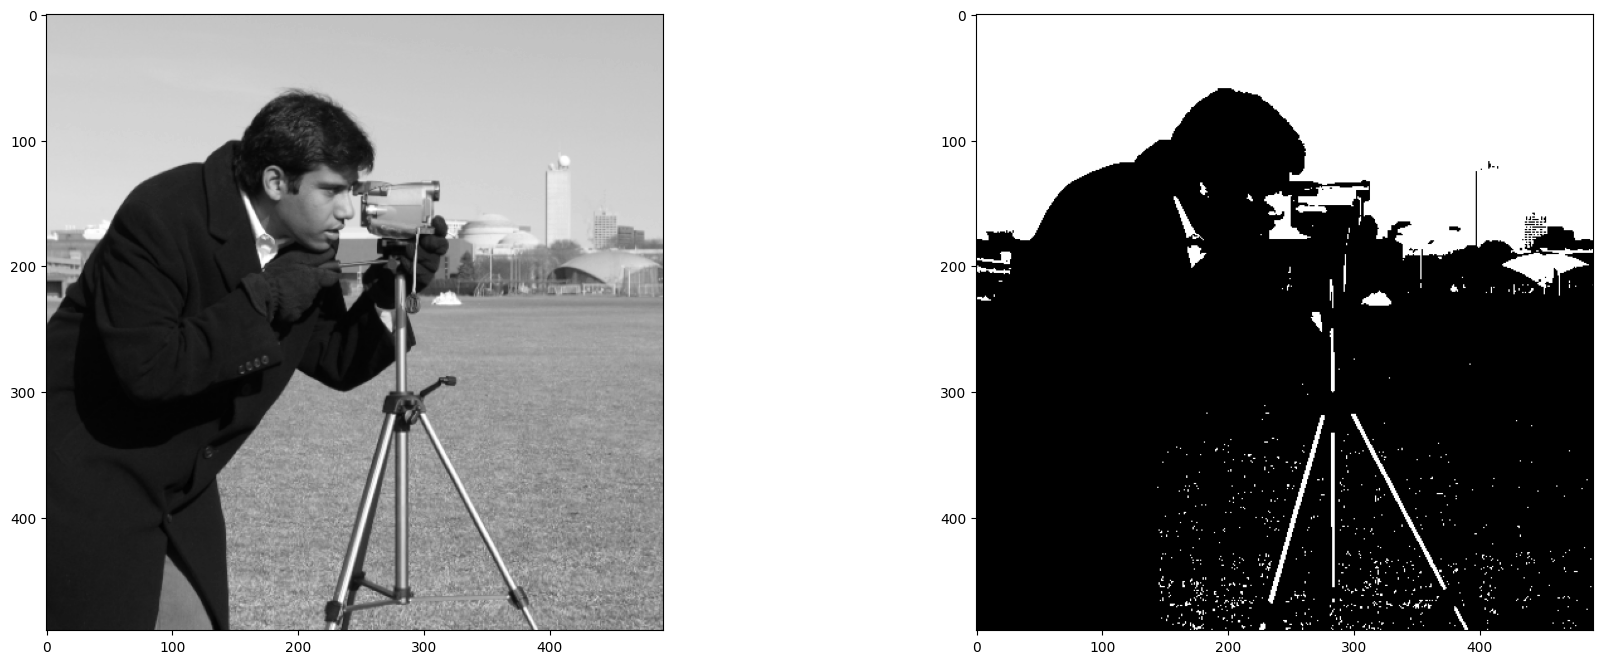

In [ ]:
img_b = (img > 180).astype('int16')
plot_images(img, img_b)

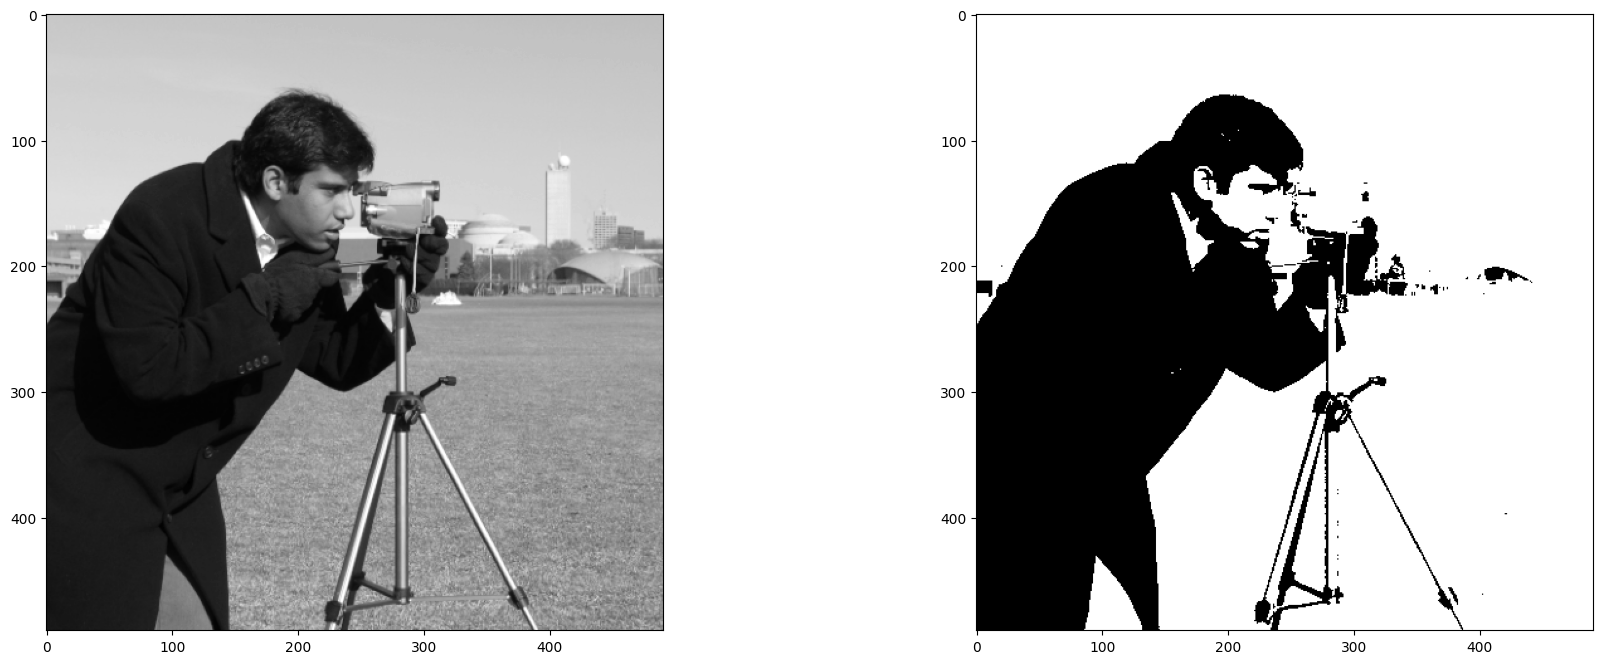

In [ ]:
img_b = (img > 90).astype('int16')
plot_images(img, img_b)

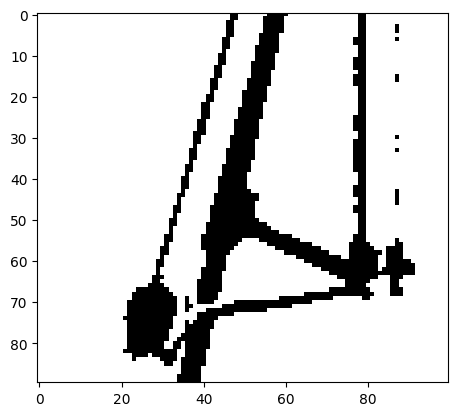

In [ ]:
plt.imshow(img_b[400:,200:300], cmap='gray');

In [ ]:
print(img_b[210:227,:20])

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]]


##7.2 Connected Components

Connected-component labeling is used in computer vision to detect connected regions in binary digital images.

Usage: geometric feature extraction, segmentation, blob detection

**A pixel can have 4 or 8 neighbours:**

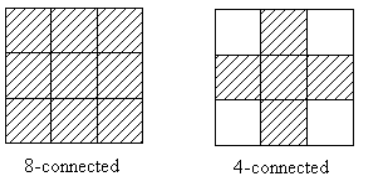

**Tag Connected Components algorithm**

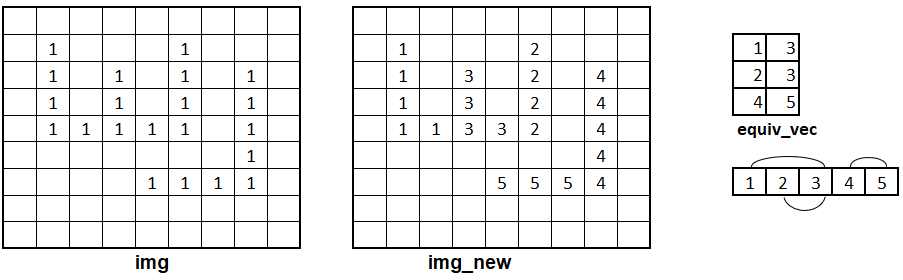

**step 1 - scan the binary image and create the equivalence table**

```
maxtag = 0
equiv_vec = []
img_new = np.zeros(shape=(img_nrows, img_ncols))    - new matrix, same shape
Scan rows top to bottom and cols left to right. without first and last elements.
1. If img[r,c] == 0
    continue            - (do nothing)
2. if above (img_new[r-1,c]) == 0 and left (img_new[r,c-1]) == 0
   maxtag = maxtag + 1
   img_new[r,c] = maxtag
3. if above > 0 and left == 0 (just above pixel has a tag)
   img_new [r,c] = img_new[r-1,c]
4. if above == 0 and left > 0 (just left pixel has a tag)
   img_new [r,c] = img_new[r,c-1]
5. if above > 0 and left > 0 and above == left (both above and left pixel have tags and tags are the same)
   img_new [r,c] = img_new[r-1,c]
6. if above > 0 and left > 0 and above != left (both above and left pixel have tags and tags are different)
   img_new [r,c] = img_new[r-1,c]
   append (img_newl[r-1,c], img_new[r,c-1]) to equiv_vec
   append (img_new[r,c-1], img_new[r-1,c]) to equiv_vec
```

**step 2 - Create the cliques matrix**

    - create cliques matrix (I) size (maxtag, maxtag) of zeros
    - for (tag1, tag2) in equiv_vec: I[tag1-1, tag2-1] = 1

Next, create `I2` - the full connection matrix -

`I2[i, j] == 1 if I[i, k] == 1 and I[j, k] == 1`

the procedure is repeated till all indirect connections are included.

```
    while True:
        I2 = I @ I                (mat multiply)
        I2 = np.minimum(I2, 1);   (above 1 become 1)
        if (I == I2).all():       (if I and I2 are the same, then stop)
            break
        I = I2
```

In [ ]:
I = np.array([[1,0,1,0,0],
              [0,1,1,0,0],
              [1,1,1,0,0],
              [0,0,0,1,1],
              [0,0,0,1,1]])
I2 = I@I
I2

array([[2, 1, 2, 0, 0],
       [1, 2, 2, 0, 0],
       [2, 2, 3, 0, 0],
       [0, 0, 0, 2, 2],
       [0, 0, 0, 2, 2]])

Note that: $I^2_{i,j}=\sum_{{k=1}}^{{n}}{I_{i,k} \times I_{k,j}}$

Therefore if $i$ is connected to $k$, and $k$ connected to $j$, $i$ will get connected to $j$. In other words: if edge $i$ is connected to edge $j$ via intermediate edge $k$.

It will be enough to perform $log(n)$ multiplications.

A pseudo code:
```python
I2 = I
while True:
    I = I2
    I2 = I @ I
    I2 = min(I2, 1)
    if I2 == I:
        break
```


In [ ]:
I2 = np.minimum(I2, 1)
I2

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1]])

**step 3 - Build the conversion vector**
- We will scan `I2` line by line
- Find the index of first zero.
- Multiply the next lines by next consecutive tag.

```
    cv = I2[0, :]
    tagmin = 1
    cv_len = len(cv)
    for i in range(1, cv_len):
        if cv[i] == 0:
            tagmin = tagmin + 1
            cv = cv + tagmin*I2[i,:]
```


we will get: `cv = [1,1,1,2,2]`

**step 4 - modify img_new: convert non-connected to connected components**

```
    for r in range(1, img_nrows):
        for c in range(1, img_ncols):
            if img_new[r, c] > 0:
                    img_new[r,c] = cv[int(img_new[r,c])-1]
```

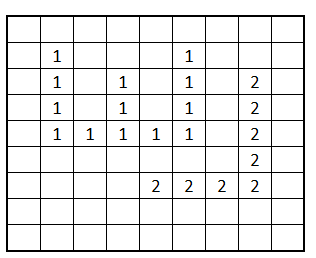

To summarize, there are 4 consecutive loops in the algorithm:
1. scan the binary image and create the **equivalence table**.
   1. input: img - binary image, shape: (nrows, ncols)
   2. create img_new - filled with zeros, shape (norws, ncols)
   3. while scanning:
      - fill img_new with tags
      - increment tag when needed (maxtag)
      - add tuple (i, j) to to equiv_vec. meaning - itag i connected to tag j
   4. create equiv_table, shape (maxtag, maxtag) using equiv_vec. diagonal should have 1s.
2. convert equivalence table to a **clique matrix**, and locate the cliques using matrix multiplications.
   1. create equiv2 - the full connection matrix - equiv2(i, j) == 1 if equiv(i, k) == 1 and equiv(k, j) == 1. the procedure is repeated till all indirect connections are included
3. build the **conversion vector**.
4. create a **connected components image** using the conversion vector.

